<a href="https://colab.research.google.com/github/FELIX-GEORGE/WeatherPrediction_ML_Model/blob/main/weather_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RAINYDAY PREDICTION**

Weather prediction, also known as weather forecasting, is the process of using scientific methods to estimate the state of the atmosphere at a specific location and time in the future. It involves analyzing various meteorological data, such as temperature, humidity, wind speed, and atmospheric pressure, to make predictions about weather conditions like rain, snow, storms, and temperature changes.

**WHAT MACHINE LAERING CAN DO IN RAINFALL PREDICTION**

Machine learning has transformed weather prediction by efficiently analyzing vast datasets, identifying patterns, and uncovering subtle correlations in historical and real-time weather data. This technology enhances accuracy, enabling early warnings for extreme events like hurricanes. Ensemble forecasting, employing multiple simulations with varied initial conditions, improves prediction reliability, especially for uncertain weather events. Machine learning also enables nowcasting, providing immediate short-term forecasts crucial for decision-making. Additionally, customized forecasts tailored to specific regions enhance accuracy, benefiting sectors like agriculture and disaster preparedness. These advancements significantly impact various industries, improving weather forecasts and aiding in crucial decision-making processes.

**ABOUT THE DATA**

This is a simple beginner level machine learning project to predict only two outputs,or weather conditions that is whether it is a rainy day or sunny day.the key features in the data sets are explained below

MinTemp: Minimum temperature in degrees Celsius recorded for the day.

MaxTemp: Maximum temperature in degrees Celsius recorded for the day.

Evaporation: The evaporation measured in millimeters for the day.

Sunshine: Number of hours of bright sunshine recorded during the day.

WindGustDir: The direction of the strongest wind gust during the day.

WindGustSpeed: Speed (in kilometers per hour) of the strongest wind gust during the day.

WindDir9am: Wind direction at 9 am.

WindDir3pm: Wind direction at 3 pm.

WindSpeed9am: Wind speed (in kilometers per hour) at 9 am.

WindSpeed3pm: Wind speed (in kilometers per hour) at 3 pm.

Humidity9am: Relative humidity at 9 am as a percentage.

Humidity3pm: Relative humidity at 3 pm as a percentage.

Pressure3pm: Atmospheric pressure (in hPa) at 3 pm.

Cloud9am: Fraction of sky obscured by cloud at 9 am.

Cloud3pm: Fraction of sky obscured by cloud at 3 pm.

Temp3pm: Temperature in degrees Celsius at 3 pm.

RISK_MM: The amount of rain recorded for the day in millimeters.

**IMPORTING LIBRRIES AND PREPARING DATA**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from skimage.io import imread
from skimage.transform import resize
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv("/content/drive/MyDrive/DATASETS/weatherpredict.csv")
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


**DATA CLEANING**

In [4]:
df=df.drop(["Rainfall","RainToday"],axis=1)
print(df)

     MinTemp  MaxTemp  Evaporation  Sunshine WindGustDir  WindGustSpeed  \
0        8.0     24.3          3.4       6.3          NW           30.0   
1       14.0     26.9          4.4       9.7         ENE           39.0   
2       13.7     23.4          5.8       3.3          NW           85.0   
3       13.3     15.5          7.2       9.1          NW           54.0   
4        7.6     16.1          5.6      10.6         SSE           50.0   
..       ...      ...          ...       ...         ...            ...   
361      9.0     30.7          7.6      12.1         NNW           76.0   
362      7.1     28.4         11.6      12.7           N           48.0   
363     12.5     19.9          8.4       5.3         ESE           43.0   
364     12.5     26.9          5.0       7.1          NW           46.0   
365     12.3     30.2          6.0      12.6          NW           78.0   

    WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0           SW         NW    

In [5]:
df.shape

(366, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Evaporation    366 non-null    float64
 3   Sunshine       363 non-null    float64
 4   WindGustDir    363 non-null    object 
 5   WindGustSpeed  364 non-null    float64
 6   WindDir9am     335 non-null    object 
 7   WindDir3pm     365 non-null    object 
 8   WindSpeed9am   359 non-null    float64
 9   WindSpeed3pm   366 non-null    int64  
 10  Humidity9am    366 non-null    int64  
 11  Humidity3pm    366 non-null    int64  
 12  Pressure9am    366 non-null    float64
 13  Pressure3pm    366 non-null    float64
 14  Cloud9am       366 non-null    int64  
 15  Cloud3pm       366 non-null    int64  
 16  Temp9am        366 non-null    float64
 17  Temp3pm        366 non-null    float64
 18  RISK_MM   

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,366.0,7.265574,6.025800,-5.3,2.300,7.45,12.500,20.9
MaxTemp,366.0,20.550273,6.690516,7.6,15.025,19.65,25.500,35.8
Evaporation,366.0,4.521858,2.669383,0.2,2.200,4.20,6.400,13.8
Sunshine,363.0,7.909366,3.481517,0.0,5.950,8.60,10.500,13.6
WindGustSpeed,364.0,39.840659,13.059807,13.0,31.000,39.00,46.000,98.0
WindSpeed9am,359.0,9.651811,7.951929,0.0,6.000,7.00,13.000,41.0
WindSpeed3pm,366.0,17.986339,8.856997,0.0,11.000,17.00,24.000,52.0
Humidity9am,366.0,72.035519,13.137058,36.0,64.000,72.00,81.000,99.0
Humidity3pm,366.0,44.519126,16.850947,13.0,32.250,43.00,55.000,96.0
Pressure9am,366.0,1019.709016,6.686212,996.5,1015.350,1020.15,1024.475,1035.7


In [8]:
df["RainTomorrow"].value_counts()#CHECKING BALANCED OR IMBALANCED

No     300
Yes     66
Name: RainTomorrow, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lst=["WindGustDir","WindDir9am","WindDir3pm",]
for i in lst:
  df[i]=le.fit_transform(df[i])
df

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow
0,8.0,24.3,3.4,6.3,7,30.0,12,7,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,3.6,Yes
1,14.0,26.9,4.4,9.7,1,39.0,0,13,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,3.6,Yes
2,13.7,23.4,5.8,3.3,7,85.0,3,5,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,39.8,Yes
3,13.3,15.5,7.2,9.1,7,54.0,14,13,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,2.8,Yes
4,7.6,16.1,5.6,10.6,10,50.0,10,2,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,7.6,12.1,6,76.0,10,7,7.0,50,38,15,1016.1,1010.8,1,3,20.4,30.0,0.0,No
362,7.1,28.4,11.6,12.7,3,48.0,6,6,2.0,19,45,22,1020.0,1016.9,0,1,17.2,28.2,0.0,No
363,12.5,19.9,8.4,5.3,2,43.0,1,1,11.0,9,63,47,1024.0,1022.8,3,2,14.5,18.3,0.0,No
364,12.5,26.9,5.0,7.1,7,46.0,11,14,6.0,28,69,39,1021.0,1016.2,6,7,15.8,25.9,0.0,No


In [10]:
df.isna().sum()

MinTemp          0
MaxTemp          0
Evaporation      0
Sunshine         3
WindGustDir      0
WindGustSpeed    2
WindDir9am       0
WindDir3pm       0
WindSpeed9am     7
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [11]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM',
       'RainTomorrow'],
      dtype='object')

In [12]:
df.rename(str.strip,axis="columns",inplace=True)
df.columns

Index(['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM',
       'RainTomorrow'],
      dtype='object')

In [13]:
for i in df.columns:
  if df[i].isna().sum()>0:
    val=df[i].mean()
    df[i]=df[i].fillna(val)
df.isna().sum()

MinTemp          0
MaxTemp          0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RISK_MM          0
RainTomorrow     0
dtype: int64

**EXPLORATORY DATA ANALYSIS**

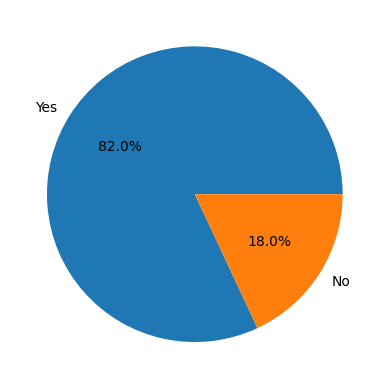

In [14]:
#exploratary data analysis
rainfall_counts = df["RainTomorrow"].value_counts()
labels = ["Yes", "No"]  # Labels for the pie chart
sizes = rainfall_counts.values

plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.show()

In [15]:
df.groupby("RainTomorrow").mean()

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
RainTomorrow,,,,,,,,,,,,,,,,,,,
No,6.607333,20.396000,4.408667,8.536396,6.310000,38.318938,7.923333,7.536667,9.326370,17.810000,70.896667,41.623333,1020.742667,1017.932333,3.496667,3.540000,11.878000,19.196333,0.056667
Yes,10.257576,21.251515,5.036364,5.059233,6.787879,46.757576,7.166667,7.757576,11.131088,18.787879,77.212121,57.681818,1015.010606,1011.710606,5.681818,6.227273,14.542424,19.387879,7.663636


In [16]:
numeric_features = (df.select_dtypes(include=np.number).columns)
print(numeric_features)
# features=list(numeric_features)

Index(['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM'],
      dtype='object')


In [17]:
df

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow
0,8.0,24.3,3.4,6.3,7,30.0,12,7,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,3.6,Yes
1,14.0,26.9,4.4,9.7,1,39.0,0,13,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,3.6,Yes
2,13.7,23.4,5.8,3.3,7,85.0,3,5,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,39.8,Yes
3,13.3,15.5,7.2,9.1,7,54.0,14,13,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,2.8,Yes
4,7.6,16.1,5.6,10.6,10,50.0,10,2,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,7.6,12.1,6,76.0,10,7,7.0,50,38,15,1016.1,1010.8,1,3,20.4,30.0,0.0,No
362,7.1,28.4,11.6,12.7,3,48.0,6,6,2.0,19,45,22,1020.0,1016.9,0,1,17.2,28.2,0.0,No
363,12.5,19.9,8.4,5.3,2,43.0,1,1,11.0,9,63,47,1024.0,1022.8,3,2,14.5,18.3,0.0,No
364,12.5,26.9,5.0,7.1,7,46.0,11,14,6.0,28,69,39,1021.0,1016.2,6,7,15.8,25.9,0.0,No


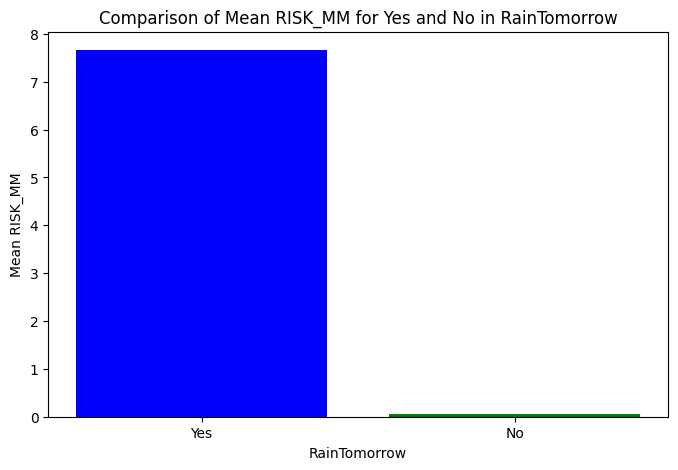

In [18]:
yes_data = df[df['RainTomorrow'] == 'Yes']['RISK_MM']
no_data = df[df['RainTomorrow'] == 'No']['RISK_MM']

# Calculate the mean or median for each category
yes_mean = yes_data.mean()
no_mean = no_data.mean()

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(['Yes', 'No'], [yes_mean, no_mean], color=['blue', 'green'])

# Add labels and title
plt.xlabel('RainTomorrow')
plt.ylabel('Mean RISK_MM')
plt.title('Comparison of Mean RISK_MM for Yes and No in RainTomorrow')

# Show the plot
plt.show()

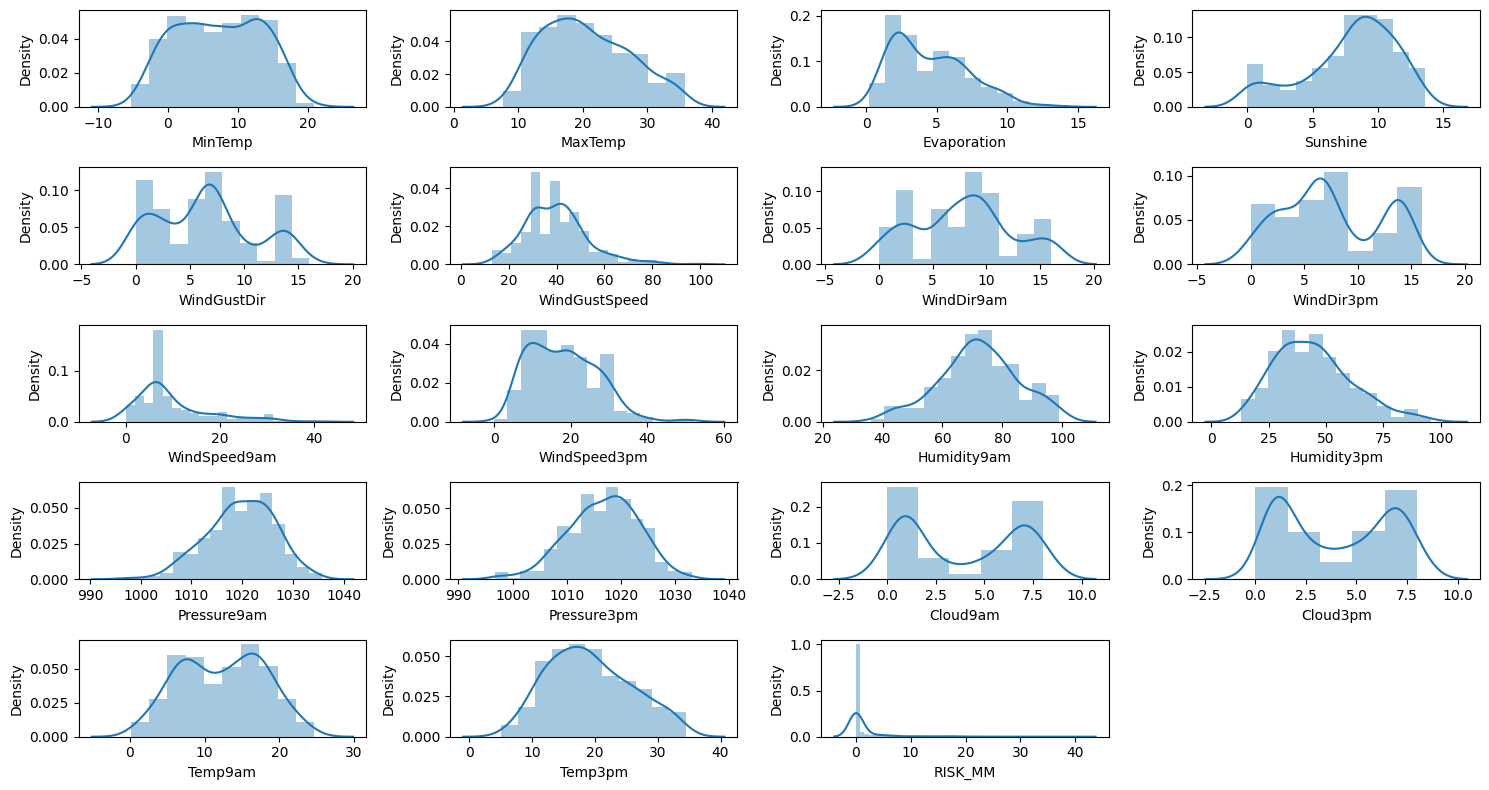

In [19]:
plt.subplots(figsize=(15, 8))
for i, col in enumerate(numeric_features):
    plt.subplot(5, 4, i + 1)
    sb.distplot(df[col])
    plt.xlabel(col)

plt.tight_layout()
plt.show()

Index(['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM'],
      dtype='object')


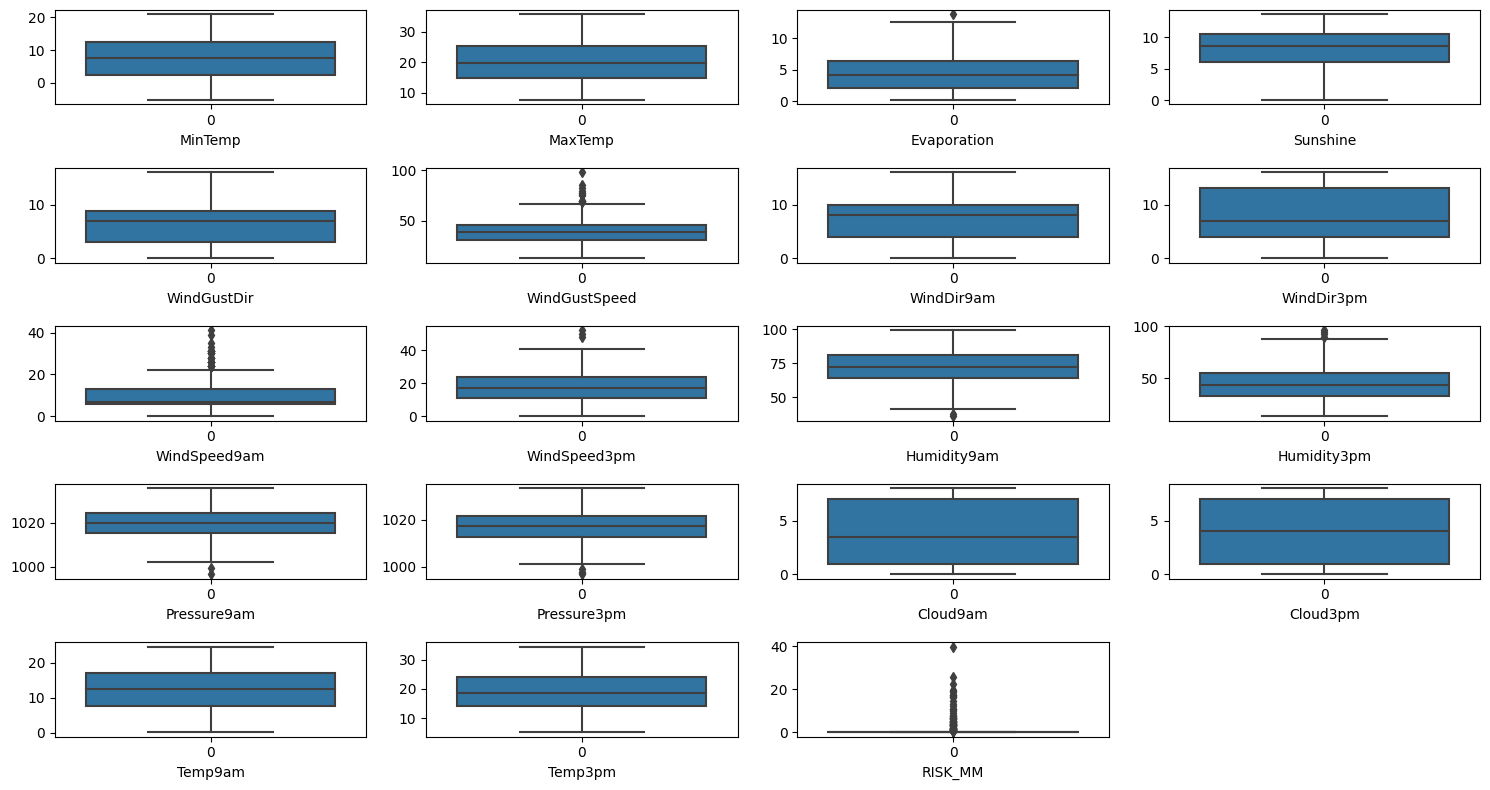

In [20]:
 #to check the outliers
numeric_features = df.select_dtypes(include=np.number).columns
print(numeric_features)
plt.subplots(figsize=(15,8))
for i,col in enumerate (numeric_features):
  plt.subplot(5,4,i+1)
  sb.boxplot(df[col])
  plt.xlabel(col)
plt.tight_layout()
plt.show()


In [21]:
df["RainTomorrow"]=df["RainTomorrow"].map({"Yes":1,"No":0})
df["RainTomorrow"]

0      1
1      1
2      1
3      1
4      0
      ..
361    0
362    0
363    0
364    0
365    0
Name: RainTomorrow, Length: 366, dtype: int64

**DATA REDUCTION**

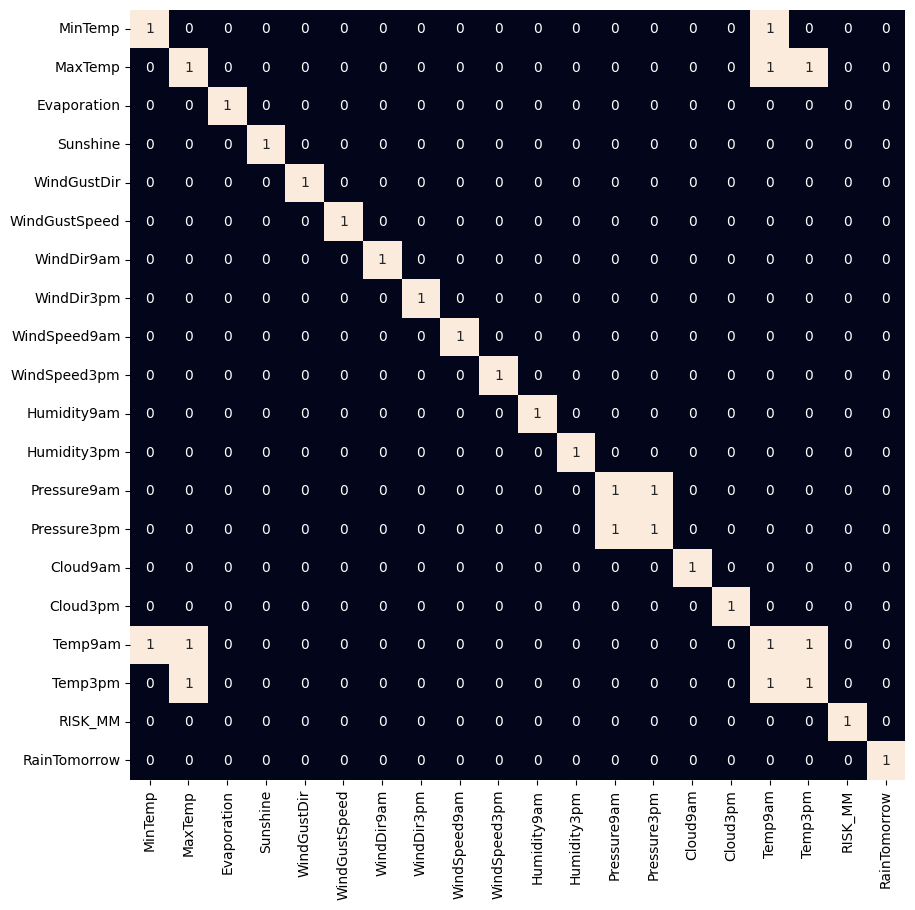

In [22]:
plt.figure(figsize=(10,10))
sb.heatmap(df.corr()>0.8,annot=True,cbar=False)
plt.show()

In [23]:
df.corr()

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow
MinTemp,1.000000,0.752471,0.649930,0.035531,-0.207415,0.217224,-0.247843,-0.063849,0.126251,-0.065922,-0.207897,-0.040709,-0.501707,-0.498007,0.215776,0.118397,0.916745,0.722730,0.218551,0.233213
MaxTemp,0.752471,1.000000,0.690026,0.451395,-0.225633,0.109415,-0.177313,0.013260,-0.214649,-0.167873,-0.359602,-0.533327,-0.290883,-0.379394,-0.175730,-0.135991,0.870604,0.989261,0.027557,0.049228
Evaporation,0.649930,0.690026,1.000000,0.316942,-0.189593,0.287709,-0.236797,-0.074369,0.068176,0.048601,-0.519587,-0.391780,-0.381906,-0.391093,-0.106007,-0.100045,0.707676,0.671632,0.076762,0.090528
Sunshine,0.035531,0.451395,0.316942,1.000000,-0.038679,0.095676,-0.061249,0.135211,-0.064200,0.072494,-0.497692,-0.755186,0.006238,-0.035964,-0.678125,-0.658699,0.219276,0.469774,-0.378081,-0.386095
WindGustDir,-0.207415,-0.225633,-0.189593,-0.038679,1.000000,0.218289,0.115565,0.354051,0.164012,0.305344,0.055546,0.072419,-0.140887,-0.139452,0.000601,-0.017459,-0.215087,-0.229800,0.040195,0.041922
WindGustSpeed,0.217224,0.109415,0.287709,0.095676,0.218289,1.000000,-0.100781,0.167105,0.518508,0.693641,-0.349433,-0.069432,-0.537126,-0.524435,-0.012648,0.050051,0.255331,0.072348,0.251912,0.249445
WindDir9am,-0.247843,-0.177313,-0.236797,-0.061249,0.115565,-0.100781,1.000000,0.054961,-0.113786,-0.012448,0.113084,0.016604,0.113071,0.104286,-0.037391,0.063241,-0.226023,-0.156527,-0.096050,-0.064743
WindDir3pm,-0.063849,0.013260,-0.074369,0.135211,0.354051,0.167105,0.054961,1.000000,0.071247,0.132152,0.017569,-0.147176,-0.242707,-0.237190,-0.153096,-0.116438,-0.060438,0.017418,-0.069973,0.018634
WindSpeed9am,0.126251,-0.214649,0.068176,-0.064200,0.164012,0.518508,-0.113786,0.071247,1.000000,0.467090,-0.267654,0.145866,-0.350416,-0.243102,0.100961,-0.022312,0.063303,-0.232944,0.039048,0.088224
WindSpeed3pm,-0.065922,-0.167873,0.048601,0.072494,0.305344,0.693641,-0.012448,0.132152,0.467090,1.000000,-0.266092,-0.026368,-0.359800,-0.337325,-0.026426,0.007207,-0.017766,-0.187570,-0.009447,0.042505


<Axes: >

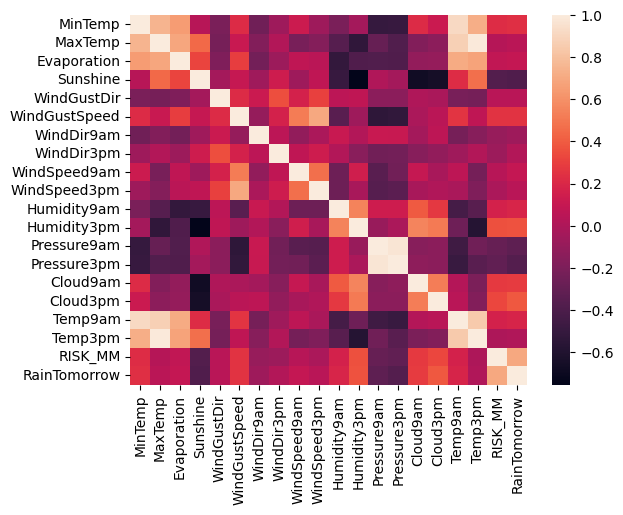

In [24]:
df.corr()
sb.heatmap(df.corr())

In [25]:
df.drop(["Temp9am", "Pressure9am"], axis=1, inplace=True)
df

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RISK_MM,RainTomorrow
0,8.0,24.3,3.4,6.3,7,30.0,12,7,6.0,20,68,29,1015.0,7,7,23.6,3.6,1
1,14.0,26.9,4.4,9.7,1,39.0,0,13,4.0,17,80,36,1008.4,5,3,25.7,3.6,1
2,13.7,23.4,5.8,3.3,7,85.0,3,5,6.0,6,82,69,1007.2,8,7,20.2,39.8,1
3,13.3,15.5,7.2,9.1,7,54.0,14,13,30.0,24,62,56,1007.0,2,7,14.1,2.8,1
4,7.6,16.1,5.6,10.6,10,50.0,10,2,20.0,28,68,49,1018.5,7,7,15.4,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,7.6,12.1,6,76.0,10,7,7.0,50,38,15,1010.8,1,3,30.0,0.0,0
362,7.1,28.4,11.6,12.7,3,48.0,6,6,2.0,19,45,22,1016.9,0,1,28.2,0.0,0
363,12.5,19.9,8.4,5.3,2,43.0,1,1,11.0,9,63,47,1022.8,3,2,18.3,0.0,0
364,12.5,26.9,5.0,7.1,7,46.0,11,14,6.0,28,69,39,1016.2,6,7,25.9,0.0,0


In [26]:
features=df.drop(["RainTomorrow"],axis=1)
features

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RISK_MM
0,8.0,24.3,3.4,6.3,7,30.0,12,7,6.0,20,68,29,1015.0,7,7,23.6,3.6
1,14.0,26.9,4.4,9.7,1,39.0,0,13,4.0,17,80,36,1008.4,5,3,25.7,3.6
2,13.7,23.4,5.8,3.3,7,85.0,3,5,6.0,6,82,69,1007.2,8,7,20.2,39.8
3,13.3,15.5,7.2,9.1,7,54.0,14,13,30.0,24,62,56,1007.0,2,7,14.1,2.8
4,7.6,16.1,5.6,10.6,10,50.0,10,2,20.0,28,68,49,1018.5,7,7,15.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,7.6,12.1,6,76.0,10,7,7.0,50,38,15,1010.8,1,3,30.0,0.0
362,7.1,28.4,11.6,12.7,3,48.0,6,6,2.0,19,45,22,1016.9,0,1,28.2,0.0
363,12.5,19.9,8.4,5.3,2,43.0,1,1,11.0,9,63,47,1022.8,3,2,18.3,0.0
364,12.5,26.9,5.0,7.1,7,46.0,11,14,6.0,28,69,39,1016.2,6,7,25.9,0.0


In [27]:
target=df["RainTomorrow"]
target

0      1
1      1
2      1
3      1
4      0
      ..
361    0
362    0
363    0
364    0
365    0
Name: RainTomorrow, Length: 366, dtype: int64

In [28]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.3,stratify=target,random_state=1)

OVER SAMPLING

In [29]:
ros=RandomOverSampler(sampling_strategy="minority",random_state=22)
X,Y=ros.fit_resample(X_train,y_train)

NORMALISATION AND SCALING

In [30]:
scaler=StandardScaler()
X=scaler.fit_transform(X)
X_test=scaler.transform(X_test)

ALGORITHM SELECTION

In [31]:
lr = LogisticRegression()
xgb = XGBClassifier()
svc = SVC()
rf = RandomForestClassifier()
dt=DecisionTreeClassifier()

# List of classifiers
classifiers = [lr, xgb, svc, rf,dt]

# Train and evaluate classifiers
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f'Results for {clf.__class__.__name__}:')
    print(classification_report(y_test, y_pred))

Results for LogisticRegression:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        90
           1       1.00      0.75      0.86        20

    accuracy                           0.95       110
   macro avg       0.97      0.88      0.92       110
weighted avg       0.96      0.95      0.95       110

Results for XGBClassifier:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        90
           1       1.00      0.20      0.33        20

    accuracy                           0.85       110
   macro avg       0.92      0.60      0.63       110
weighted avg       0.88      0.85      0.81       110

Results for SVC:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        90
           1       0.00      0.00      0.00        20

    accuracy                           0.82       110
   macro avg       0.41      0.50      0.45       11

HYPOPARAMETER TUNING

In [32]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Penalty type L1 ABSOLUTE DEVIATION L2 LESAST SQUARES
    'solver': ['liblinear', 'saga']  # Solver for optimization
}


grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Best Hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.9545454545454546
Confusion Matrix:
 [[90  0]
 [ 5 15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        90
           1       1.00      0.75      0.86        20

    accuracy                           0.95       110
   macro avg       0.97      0.88      0.92       110
weighted avg       0.96      0.95      0.95       110



THE BEST RESULT IS GIVEN BY LOGISTIC REGRESSION

PREDICTION

In [33]:
input_data = (7.6, 16.1, 5.6, 10.6, 10, 50.0, 10, 2, 20.0, 28, 68, 49, 1018.5, 7, 7, 15.4, 0.0)
input_data_numpy = np.asarray(input_data)
input_data_reshape = input_data_numpy.reshape(1, -1)


ITS A SUNNY DAYYYY!!!!!!


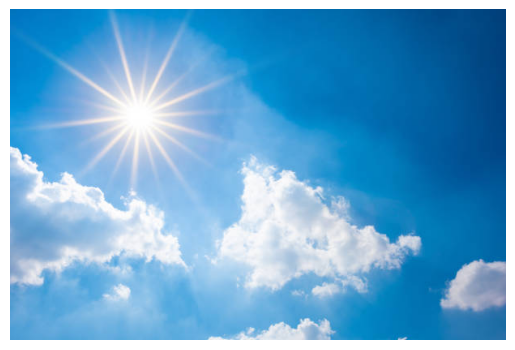

In [34]:
# prediction=lr.predict(scaler.transform([[MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm	,RISK_MM]]))
prediction=lr.predict(input_data_reshape)
if prediction ==1:
  print("ITS A RAINY DAYYYY!!!!!!")
  new_image=imread("/content/drive/MyDrive/DATASETS/rainyday.jpg")
  plt.imshow(new_image)
  plt.axis('off')
else:
  print("ITS A SUNNY DAYYYY!!!!!!")
  new_image1=imread("/content/drive/MyDrive/DATASETS/sunnyday.jpg")
  plt.imshow(new_image1)
  plt.axis('off')


SAVING THE MODEL FOR STREAMLIT

In [35]:
#saving the trained model
import pickle
file_name="trained_weather_model.sav"
pickle.dump(lr,open(file_name,"wb"))

In [36]:
# loading saved model
loaded_model=pickle.load(open("trained_weather_model.sav","rb"))

In [37]:


def load_your_data_function(file_path):
    # Read the CSV file into a DataFrame
    data = pd.read_csv(file_path)
    return data

file_path = '/content/drive/MyDrive/DATASETS/weathereport.csv'

# Call the function to load your data
data = load_your_data_function(file_path)


In [38]:
with open('data.pkl', 'wb') as file:
    pickle.dump(data, file)

In [39]:
with open('data.pkl', 'rb') as file:
     data = pickle.load(file)